Контроль — SARSA и Q-learning

поведение SARSA (on-policy) и Q-learning (off-policy) в задаче FrozenLake

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [3]:
env = gym.make("FrozenLake-v1", is_slippery=True)
n_states = env.observation_space.n
n_actions = env.action_space.n

In [4]:
alpha = 0.1
gamma = 0.99
epsilon = 0.1
episodes = 10000

In [5]:
def epsilon_greedy(Q, state):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

Q_sarsa = np.zeros((n_states, n_actions))
Q_q = np.zeros((n_states, n_actions))

rewards_sarsa, rewards_q = [], []

In [6]:
def run_sarsa(Q):
    s, _ = env.reset()
    a = epsilon_greedy(Q, s)
    total_reward = 0
    while True:
        s_next, r, terminated, truncated, _ = env.step(a)
        a_next = epsilon_greedy(Q, s_next)
        Q[s, a] += alpha * (r + gamma * Q[s_next, a_next] - Q[s, a])
        s, a = s_next, a_next
        total_reward += r
        if terminated or truncated:
            break
    return total_reward

In [7]:
def run_qlearning(Q):
    s, _ = env.reset()
    total_reward = 0
    while True:
        a = epsilon_greedy(Q, s)
        s_next, r, terminated, truncated, _ = env.step(a)
        Q[s, a] += alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
        s = s_next
        total_reward += r
        if terminated or truncated:
            break
    return total_reward

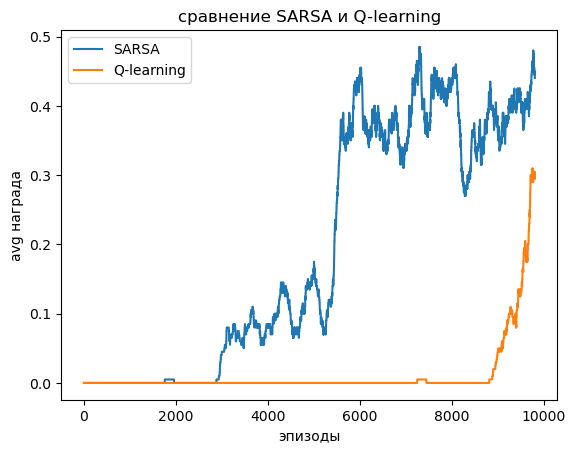

In [8]:
for i in range(episodes):
    rewards_sarsa.append(run_sarsa(Q_sarsa))
    rewards_q.append(run_qlearning(Q_q))

plt.plot(np.convolve(rewards_sarsa, np.ones(200)/200, mode='valid'), label="SARSA")
plt.plot(np.convolve(rewards_q, np.ones(200)/200, mode='valid'), label="Q-learning")
plt.legend()
plt.title("сравнение SARSA и Q-learning")
plt.xlabel("эпизоды")
plt.ylabel("avg награда")
plt.show()